In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv('Bank_Additional.csv',';')
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# This dataset is related with the marketing campaigns done by a portugese bank. A large number of customers were called
# on phone making requests to subscribe to a term deposit plan by the bank. This dataset consist of 41188 datapoints 
# and 21 features. Here in this project we are trying to create a classification model that can predict the potential cusomters
# who may accept the bank's request to subscribe the term deposit. It is also planned to optimize the model through feature
# engineering so that maximum accuracy is obtained with minimum possible features. 

#The dataset have 41188 observations and 21 features. Out of this features 11 are categorical and 10 are numberical.

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

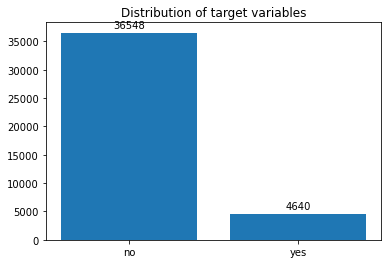

In [6]:
#  This dataset is a higly imbalanced when considering the target variable 'y'. Out of 41188 customers who were 
# contacted for selling the term deposit plan, only 4640 people responded positively and 36548 customers turned down
# the request. Means only 11.2% of the dataset gave a desired response.

plt.title('Distribution of target variables')
plt.bar(x = list(df.y.value_counts().index), height = list(df.y.value_counts().values))
x =  list(df.y.value_counts().index)
height = list(df.y.value_counts().values)
for i in range(len(x)):
    plt.text(i,height[i]+500,height[i],ha = 'center',va = 'bottom')

In [7]:
#EXPLORATORY DATA ANALYSIS

In [8]:
#AGE FEATURE

In [9]:
# The age feature ranges from 17 to 98. I believe there is no need of finding outliers from this distribution
# because both these extremes are possible ages to get contacted by bank officials requesting subscription to a plan. A 98 
# year old wealthy person can be contacted to start a term plan for his/her grandchildren. A 17 year old student with
# saving habits can also get contacted by a bank to start a term plan. Mean age of the respondents is 40. Most number
# of respondents are in the 25-45 age bracket and a similar pattern is observed in the age group of people accepted the
# subscription plan as well.

<AxesSubplot:title={'center':'Age Density(Yes Vs No)'}, xlabel='age', ylabel='Density'>

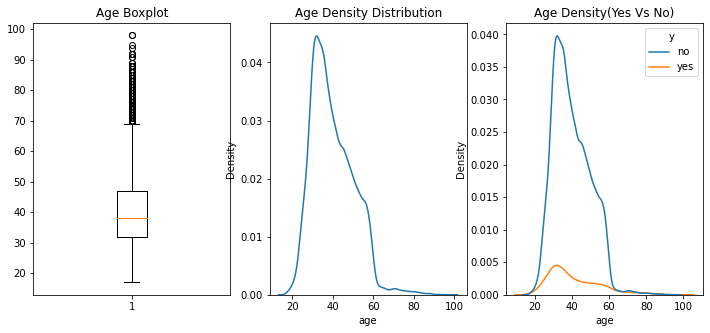

In [11]:
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
plt.title('Age Boxplot')
plt.boxplot(df.age)

plt.subplot(1,3,2)
plt.title('Age Density Distribution')
sns.kdeplot(x = df.age)

plt.subplot(1,3,3)
plt.title('Age Density(Yes Vs No)')
sns.kdeplot(x = 'age', hue = 'y', data = df)


In [12]:
#JOB FEATURE

In [13]:
jobdf = pd.DataFrame()
jobdf['Job_Title'] = list(df.job.value_counts().index)
jobdf['yes'] = list(df[df['y']=='yes']['job'].value_counts())
jobdf['no'] = list(df[df['y']=='no']['job'].value_counts())
jobdf['Total'] = list(df.job.value_counts().values)
job_per = []
for i in range(len(jobdf)):
    avg = round((jobdf['yes'][i]/jobdf['Total'][i])*100,2)
    job_per.append(avg)
jobdf['Acceptance%'] = job_per
jobdf

,Job_Title,yes,no,Total,Acceptance%
0,admin.,1352,9070,10422,12.97
1,blue-collar,730,8616,9254,7.89
2,technician,638,6013,6743,9.46
3,services,434,3646,3969,10.93
4,management,328,2596,2924,11.22
5,retired,323,1332,1720,18.78
6,entrepreneur,275,1286,1456,18.89
7,self-employed,149,1272,1421,10.49
8,housemaid,144,954,1060,13.58
9,unemployed,124,870,1014,12.23


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

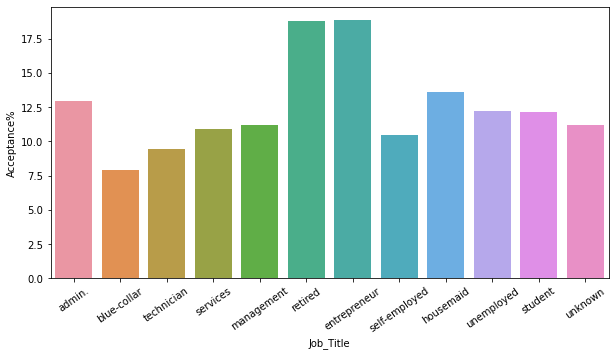

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(x = jobdf['Job_Title'],y = jobdf['Acceptance%'])
plt.xticks(rotation = 35)

In [15]:
# Highest number of respondents where from jobs like admin, blue-collar jobs and technicians while the least number of
# contacts were made to students and unemployed. Out of all jobs entrepreneurs and retired people are more accepting the
# subscription request when compared to other jobs. Blue-collar employees and technicians are most difficult professions
# to close.

In [16]:
#MARITAL FEATURE

In [17]:
# The marital feature contains 4 categories married, single, divorced and unknown. Married and single makes the chunk of data
# and unknown is the least in number. The unknown values in the dataset are very misleading because unlike an NA it can take
# any value. So it would be better to avoid the unknown values from the dataset to get more meaning from the features. Singles 
# have a slightly higher chance of accepting the subscription request than married and divorced customers

In [18]:
mardf = pd.DataFrame()
mardf['Marital_Status'] = list(df.marital.value_counts().index)
mardf['Yes'] = list(df[df['y']=='yes']['marital'].value_counts())
mardf['No'] = list(df[df['y']=='no']['marital'].value_counts())
mardf['Total'] = list(df.marital.value_counts().values)
mar_per = []
for i in range(len(mardf)):
    avg = round((mardf['Yes'][i]/mardf['Total'][i])*100,2)
    mar_per.append(avg)
mardf['Acceptance%'] = mar_per
mardf

,Marital_Status,Yes,No,Total,Acceptance%
0,married,2532,22396,24928,10.16
1,single,1620,9948,11568,14.00
2,divorced,476,4136,4612,10.32
3,unknown,12,68,80,15.00


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Marital_Status', ylabel='Acceptance%'>

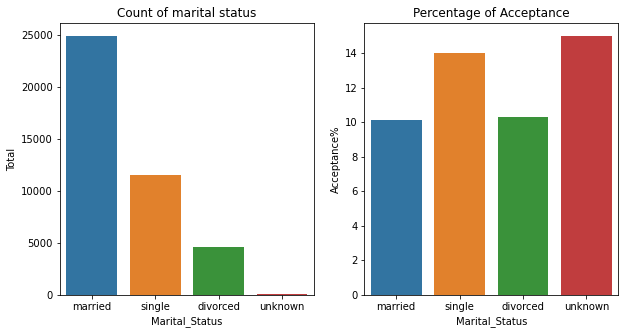

In [19]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title('Count of marital status')
sns.barplot(x = mardf['Marital_Status'], y = mardf['Total'])

plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = mardf['Marital_Status'],y = mardf['Acceptance%'])

In [20]:
#EDUCATION FEATURE

In [22]:
edudf = pd.DataFrame()
edudf['Education'] = list(df.education.value_counts().index)
edudf['Yes'] = list(df[df['y']=='yes']['education'].value_counts())
edudf['No'] = list(df[df['y']=='no']['education'].value_counts())
edudf['Total'] = list(df.education.value_counts().values)
edu_per = []
for i in range(len(edudf)):
    avg = round((edudf['Yes'][i]/edudf['Total'][i])*100,2)
    edu_per.append(avg)
edudf['Acceptance%'] = edu_per
edudf


,Education,Yes,No,Total,Acceptance%
0,university.degree,1670,10498,12168,13.72
1,high.school,1031,8484,9515,10.84
2,basic.9y,595,5572,6045,9.84
3,professional.course,473,4648,5243,9.02
4,basic.4y,428,3748,4176,10.25
5,basic.6y,251,2104,2292,10.95
6,unknown,188,1480,1731,10.86
7,illiterate,4,14,18,22.22


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'university.degree'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.4y'),
  Text(5, 0, 'basic.6y'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'illiterate')])

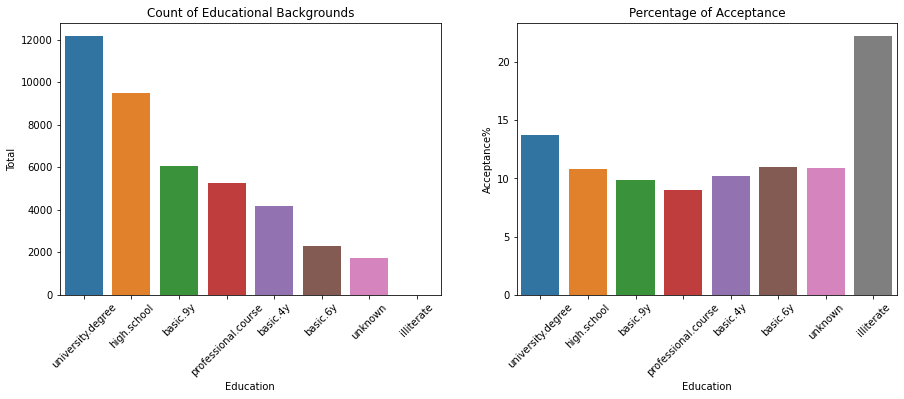

In [23]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Count of Educational Backgrounds')
sns.barplot(x = edudf['Education'], y = edudf['Total'])
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = edudf['Education'],y = edudf['Acceptance%'])
plt.xticks(rotation = 45)

In [24]:
# The population is generally educated and most of the respondents have education like a university degree or are school
# educated. There are a very few number of illiterates in the dataset and the education of a good number of people(1731)
# are unknown. Illiterate respondents are observed to have more acceptance rate than people with any other educational 
# backgrounds and people who studied professional courses are the toughest to close for the bank.

In [25]:
#DEFAULT Feature

In [26]:
defdf = pd.DataFrame()
defdf['no'] = df[df['y']=='no']['default'].value_counts()
defdf['yes'] = df[df['y']=='yes']['default'].value_counts()
defdf

,no,yes
no,28391,4197.0
unknown,8154,443.0
yes,3,NaN


<AxesSubplot:>

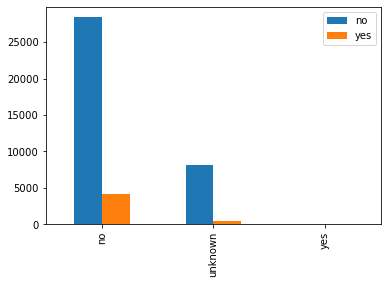

In [27]:
defdf.plot.bar()

In [28]:
# default feature is a highly imbalanced feature in terms of its content. Out of 41188 observations 32588 are 'no' and only 3
# observations are 'yes'. A large number of observations are marked unknown and this seriously affect the meaning of the entire
# feature

In [29]:
#HOUSING FEATURE

In [30]:
houdf = pd.DataFrame()
houdf['Housing_Loan'] = list(df.housing.value_counts().index)
houdf['Yes'] = list(df[df['y']=='yes']['housing'].value_counts())
houdf['No'] = list(df[df['y']=='no']['housing'].value_counts())
houdf['Total'] = list(df.housing.value_counts().values)
hou_per = []
for i in range(len(houdf)):
    avg = round((houdf['Yes'][i]/houdf['Total'][i])*100,2)
    hou_per.append(avg)
houdf['Acceptance%'] = hou_per
houdf

,Housing_Loan,Yes,No,Total,Acceptance%
0,yes,2507,19069,21576,11.62
1,no,2026,16596,18622,10.88
2,unknown,107,883,990,10.81


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Housing_Loan', ylabel='Acceptance%'>

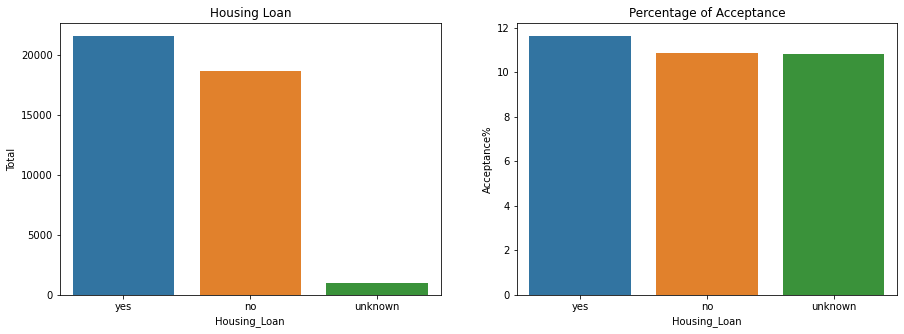

In [31]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Housing Loan')
sns.barplot(x = houdf['Housing_Loan'], y = houdf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = houdf['Housing_Loan'],y = houdf['Acceptance%'])

In [32]:
# This feature indicates whether the respondent has got an existing housing loan or not. Almost half of the respondents have a
# housing loan outstanding while the other have do not have housing loan. Status of 990 respondents are unknown. Irrespective of
# the housing loan status around 11% of the responents accept the the term deposit request

In [33]:
#LOAN Feature

In [34]:
loadf = pd.DataFrame()
loadf['Personal_Loan'] = list(df.loan.value_counts().index)
loadf['Yes'] = list(df[df['y']=='yes']['loan'].value_counts())
loadf['No'] = list(df[df['y']=='no']['loan'].value_counts())
loadf['Total'] = list(df.loan.value_counts().values)
loa_per = []
for i in range(len(loadf)):
    avg = round((loadf['Yes'][i]/loadf['Total'][i])*100,2)
    loa_per.append(avg)
loadf['Acceptance%'] = loa_per
loadf

,Personal_Loan,Yes,No,Total,Acceptance%
0,no,3850,30100,33950,11.34
1,yes,683,5565,6248,10.93
2,unknown,107,883,990,10.81


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Personal_Loan', ylabel='Acceptance%'>

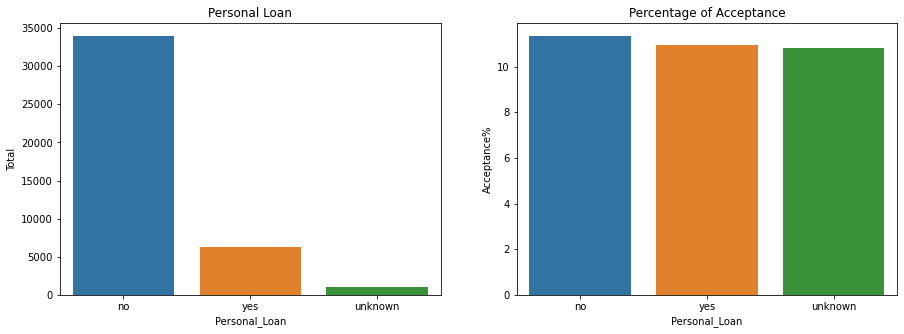

In [35]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Personal Loan')
sns.barplot(x = loadf['Personal_Loan'], y = loadf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = loadf['Personal_Loan'],y = loadf['Acceptance%'])

In [36]:
# loan feature indicates whether the respondent have any outstanding personal loan or not. Irrespective of whether the personal
# loan is outstanding or not, respondents show a similar behavior towards accepting he subscription request. Around 11 percent
# of respondents accepted the term deposit subscription request

In [37]:
#CONTACT Feature

In [38]:
condf = pd.DataFrame()
condf['Contact_Method'] = list(df.contact.value_counts().index)
condf['Yes'] = list(df[df['y']=='yes']['contact'].value_counts())
condf['No'] = list(df[df['y']=='no']['contact'].value_counts())
condf['Total'] = list(df.contact.value_counts().values)
con_per = []
for i in range(len(condf)):
    avg = round((condf['Yes'][i]/condf['Total'][i])*100,2)
    con_per.append(avg)
condf['Acceptance%'] = con_per
condf

,Contact_Method,Yes,No,Total,Acceptance%
0,cellular,3853,22291,26144,14.74
1,telephone,787,14257,15044,5.23


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Contact_Method', ylabel='Acceptance%'>

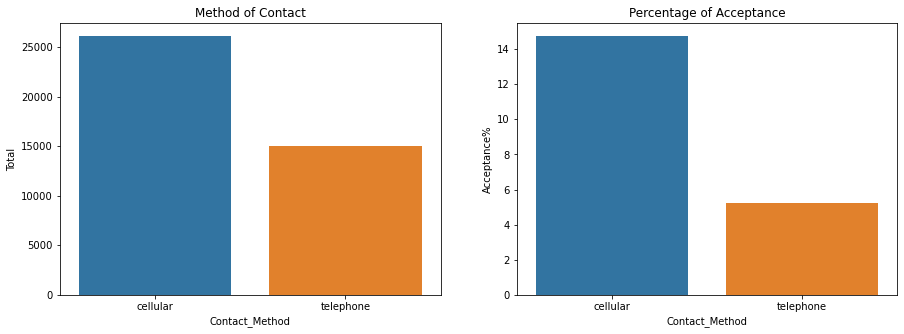

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Method of Contact')
sns.barplot(x = condf['Contact_Method'], y = condf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = condf['Contact_Method'],y = condf['Acceptance%'])

In [40]:
# The contact feature indicates the mode of contact made to the respondent, whether it is to their telephone or cellular phone. 
# 63% of the total contacts where made to cellular phones and remaining to telephones. The rate of acceptance of subscription
# request by the respondents who were contacted on cellular phone (14%) is almost 3 times compared to that of made to 
# telephones (5.23%)

In [41]:
#MONTH Feature

In [42]:
mondf = pd.DataFrame()
mondf['Month'] = list(df.month.value_counts().index)
mondf['Yes'] = list(df[df['y']=='yes']['month'].value_counts())
mondf['No'] = list(df[df['y']=='no']['month'].value_counts())
mondf['Total'] = list(df.month.value_counts().values)
mon_per = []
for i in range(len(mondf)):
    avg = round((mondf['Yes'][i]/mondf['Total'][i])*100,2)
    mon_per.append(avg)
mondf['Acceptance%'] = mon_per
mondf

,Month,Yes,No,Total,Acceptance%
0,may,886,12883,13769,6.43
1,jul,655,6525,7174,9.13
2,aug,649,5523,6178,10.51
3,jun,559,4759,5318,10.51
4,nov,539,3685,4101,13.14
5,apr,416,2093,2632,15.81
6,oct,315,403,718,43.87
7,sep,276,314,570,48.42
8,mar,256,270,546,46.89
9,dec,89,93,182,48.90


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Month', ylabel='Acceptance%'>

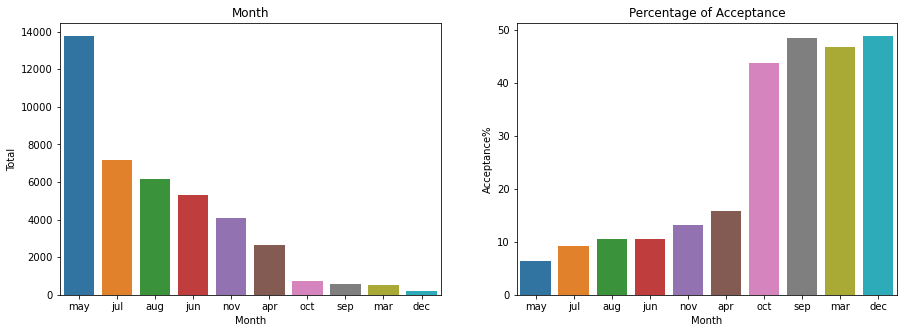

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Month')
sns.barplot(x = mondf['Month'], y = mondf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = mondf['Month'],y = mondf['Acceptance%'])

In [44]:
# This feature indicates the month on which the contacts were made. The months recorded are March, April, May, June,July, August,
# Septempber, Octorber, November and December. Months January and February are not featured. Highest number of contacts were
# made on the month May and least on December. It is interesting to observe that least acceptance rate are in the months were
# most calls were made and highest acceptance rate is in the months with lowest number of calls

In [45]:
#Day_of_Week feature

In [46]:
daydf = pd.DataFrame()
daydf['Day'] = list(df.day_of_week.value_counts().index)
daydf['Yes'] = list(df[df['y']=='yes']['day_of_week'].value_counts())
daydf['No'] = list(df[df['y']=='no']['day_of_week'].value_counts())
daydf['Total'] = list(df.day_of_week.value_counts().values)
day_per = []
for i in range(len(daydf)):
    avg = round((daydf['Yes'][i]/daydf['Total'][i])*100,2)
    day_per.append(avg)
daydf['Acceptance%'] = day_per
daydf

,Day,Yes,No,Total,Acceptance%
0,thu,1045,7667,8623,12.12
1,mon,953,7578,8514,11.19
2,wed,949,7185,8134,11.67
3,tue,847,7137,8090,10.47
4,fri,846,6981,7827,10.81


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Day', ylabel='Acceptance%'>

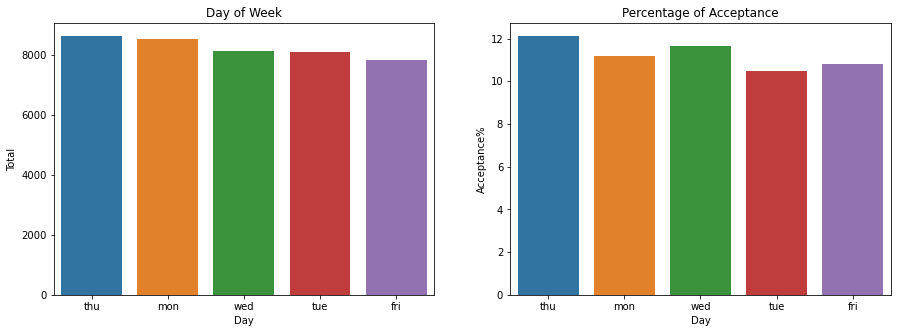

In [47]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Day of Week')
sns.barplot(x = daydf['Day'], y = daydf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = daydf['Day'],y = daydf['Acceptance%'])

In [48]:
# This feature indicates the day of week on which the contact was made. Calls were made on weekdays and not on weekends. There was
# no preference to any days for making calls and calls were made evenly throughout weekdays. So is the case with acceptance rate
# with almost 11 percentage on all days.

In [49]:
#DURATION feature

In [50]:
# The duration is a feature that can be only recorded after making a sales call and it is not logical to use this featue in 
# creating a prediction model. So this feature is removed from the dataset

In [51]:
#POUTCOME Feature

In [52]:
poudf = pd.DataFrame()
poudf['Previous_Outcome'] = list(df.poutcome.value_counts().index)
poudf['Yes'] = list(df[df['y']=='yes']['poutcome'].value_counts())
poudf['No'] = list(df[df['y']=='no']['poutcome'].value_counts())
poudf['Total'] = list(df.poutcome.value_counts().values)
pou_per = []
for i in range(len(poudf)):
    avg = round((poudf['Yes'][i]/poudf['Total'][i])*100,2)
    pou_per.append(avg)
poudf['Acceptance%'] = pou_per
poudf

,Previous_Outcome,Yes,No,Total,Acceptance%
0,nonexistent,3141,32422,35563,8.83
1,failure,894,3647,4252,21.03
2,success,605,479,1373,44.06


<AxesSubplot:title={'center':'Percentage of Acceptance'}, xlabel='Previous_Outcome', ylabel='Acceptance%'>

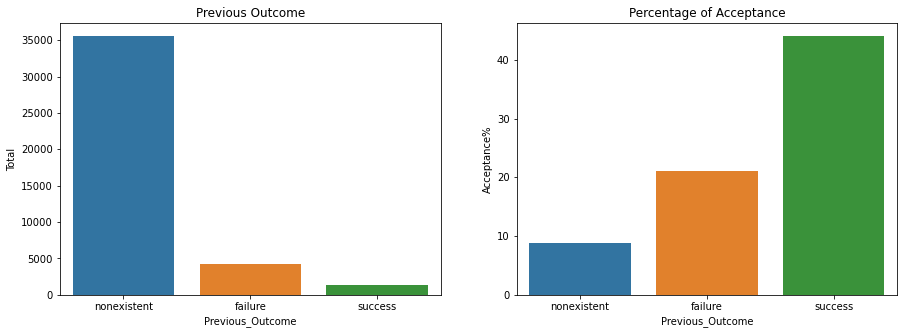

In [53]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Previous Outcome')
sns.barplot(x = poudf['Previous_Outcome'], y = poudf['Total'])


plt.subplot(1,2,2)
plt.title('Percentage of Acceptance')
sns.barplot(x = poudf['Previous_Outcome'],y = poudf['Acceptance%'])

In [54]:
# This feature is the result of the previous campaign done before with the same respondents. 86% of the calls in previous 
# campaigns produced no results while 3 percent of the respondents accepted to subscribe and 10 percent of the calls declined
# to subscribe. When it comes to the current campaign, 8.8 percentage of those cases where there was no outcome earlier and 
# 21 percentage of those who rejected earlier accepted to subscribe this time. But 44 percentage of those who 
# subscribed during the earlier campaign had accepted to subscribe during the current campaign also. 

In [ ]:
#CAMPAIGN Feature

<AxesSubplot:title={'center':'Campaign Distribution'}, xlabel='campaign', ylabel='Density'>

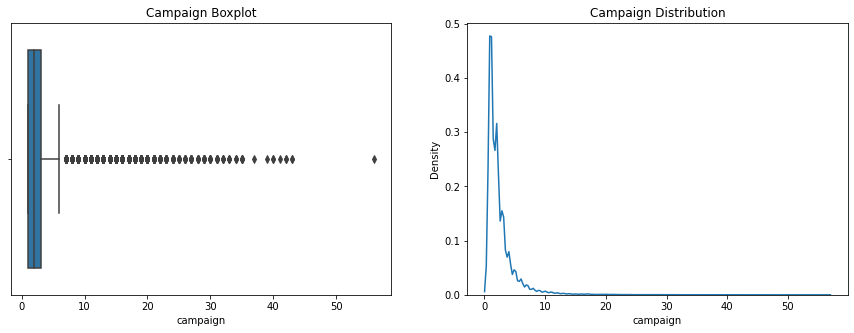

In [58]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Campaign Boxplot')
sns.boxplot(x ='campaign', data = df)


plt.subplot(1,2,2)
plt.title('Campaign Distribution')
sns.kdeplot(x = 'campaign', data = df)

In [59]:
#PREVIOUS Feature

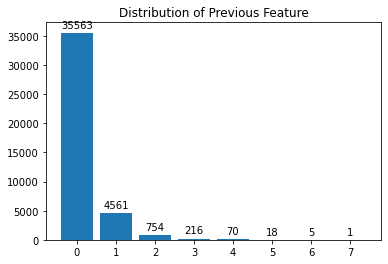

In [60]:
plt.title('Distribution of Previous Feature')
plt.bar(x = list(df.previous.value_counts().index), height = list(df.previous.value_counts().values))
x =  list(df.previous.value_counts().index)
height = list(df.previous.value_counts().values)
for i in range(len(x)):
    plt.text(i,height[i]+500,height[i],ha = 'center',va = 'bottom')

In [61]:
pre_tit = list(df['previous'].value_counts().index)
pre_per = []
for pre in pre_tit:
    if not (df[df['previous']== pre]['y'] == 'yes').sum() >= 1:
        pre_per.append(0)
    else:
        percent = ((df[df['previous']== pre]['y'] == 'yes').sum()/df.previous.value_counts()[pre])*100
        pre_per.append(percent)
    
pre_tit = pd.Series(pre_tit,name = 'Number of calls')
pre_per = pd.Series(pre_per, name = '% of Acceptance')

pd.concat([pre_tit,pre_per], axis = 1)

,Number of calls,% of Acceptance
0,0,8.832213
1,1,21.201491
2,2,46.419098
3,3,59.259259
4,4,54.285714
5,5,72.222222
6,6,60.000000
7,7,0.000000


In [63]:
# This feature indicates the number of contact made before the current campaign to a particular customer. For majority of 
# respondents (86%) there were no calls made during the previous campaing. It is also noted that the percentage of acceptance
# to term deposit subscription is increasing with the increasing number of calls made in the previous campaign. 

In [64]:
#PDAYS Feature

<AxesSubplot:xlabel='pdays', ylabel='Density'>

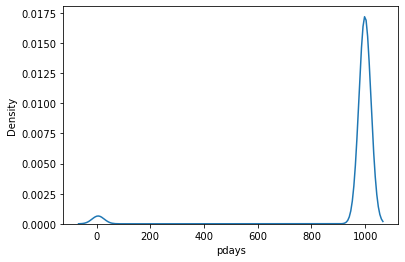

In [65]:
sns.kdeplot(x = 'pdays',data = df)

In [66]:
# This is the number of days passed after the respondent was last contacted. Around 96% of the current respondents was contacting
# for the first time during this campaign

In [67]:
# EMPLOYMENT VARIATION RATE, CONSUMER PRICE INDEX, CONSUMER CONFIDENCE INDEX, EURIBOR 3 MONTH RATE
# NUMBER OF EMPLOYEES 

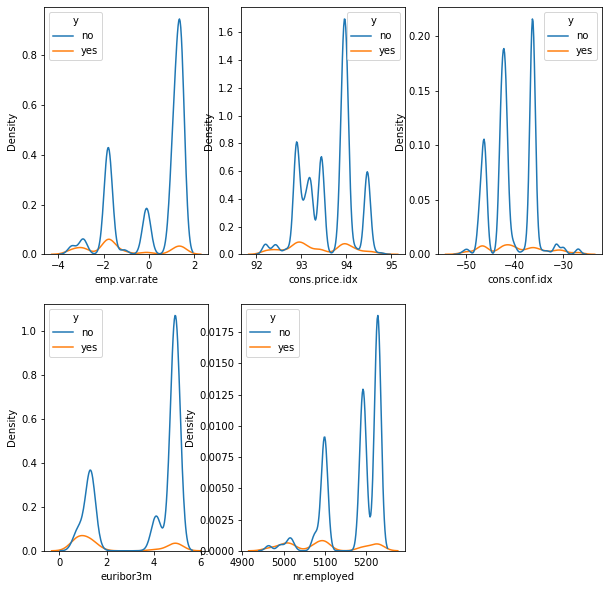

In [68]:
plt.subplot(231)
sns.kdeplot(x = 'emp.var.rate', hue = 'y', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.kdeplot(x = 'cons.price.idx', hue = 'y', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.kdeplot(x = 'cons.conf.idx', hue = 'y', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.kdeplot(x = 'euribor3m', hue = 'y', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.kdeplot(x = 'nr.employed', hue = 'y', data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)


In [69]:
# The dataset have various social and economic indicators added such as employment variation rate,consumer price index, consumer
# confidence index, euribor rates and number of employees indicator. All these indicator are highly correlated with target 
#variable. The percentage of acceptance to term deposit subscription is increasing with the increase of these rates.

<AxesSubplot:>

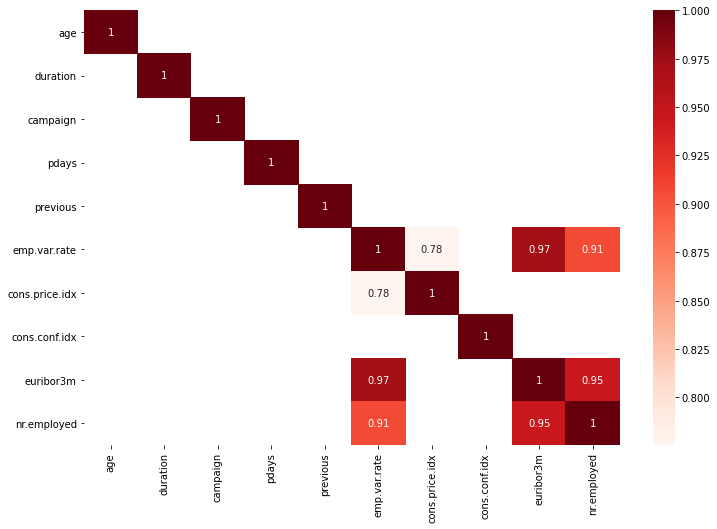

In [70]:
#Major correlated variables in the dataset
corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr[corr>=0.75], cmap = 'Reds', annot = True)

In [71]:
#Preprocessing and feature engineering

In [72]:
#creating a new copy of dataset df for feature engineering. Also deleting the duration feature for the reasons explained
#earlier
df_age = df.copy()
del df_age['duration']

In [73]:
#removing outliers from the campaign feature and removing all the rows with unknown values in the features job,education,default
#loan, housing and marital

df_age = df_age[df_age['campaign']<10]
unknown1 = list(df_age[df_age['job']=='unknown'].index)
unknown2 = list(df_age[df_age['education']=='unknown'].index)
unknown3 = list(df_age[df_age['default']=='unknown'].index)
unknown4 = list(df_age[df_age['loan']=='unknown'].index)
unknown5 = list(df_age[df_age['housing']=='unknown'].index)
unknown6 = list(df_age[df_age['marital']=='unknown'].index)
unknown_indexes = list(set(unknown1+unknown2+unknown3+unknown4+unknown5+unknown6))
ver2_indexes = list(df_age.index)
unknown_index = [x for x in ver2_indexes if x not in unknown_indexes]
df_age = df_age.loc[unknown_index]

<AxesSubplot:xlabel='age', ylabel='Count'>

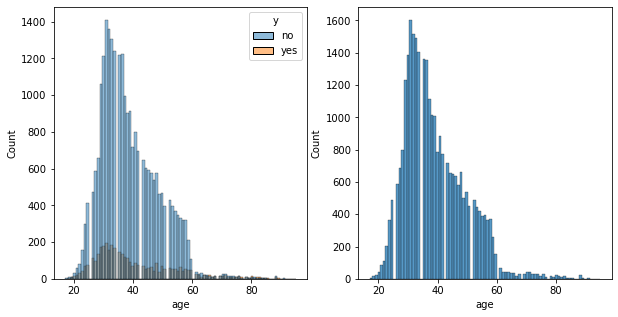

In [74]:
#Binning - identifying patterns in the distribution of age and months feature to check the possibility of binning

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(x = 'age', hue = 'y', data = df_age)
plt.subplot(1,2,2)
sns.histplot(x = 'age', data = df_age)

<AxesSubplot:title={'center':'Months - Percentage of Acceptance'}, xlabel='Month', ylabel='Acceptance%'>

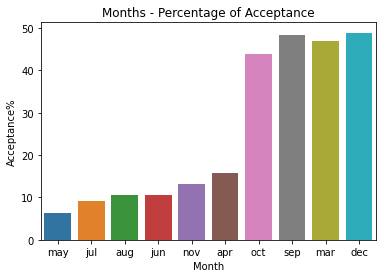

In [75]:
plt.title('Months - Percentage of Acceptance')
sns.barplot(x = mondf['Month'],y = mondf['Acceptance%'])

In [76]:
#based on the visualizations of age and months features the information can be binned into various buckets
#age is categorized into bins of 0-20,20-30,30-45,45-55,55-98
df_age['age'] = pd.cut(x = df_age['age'], bins = [0,20,30,45,55,98], 
                        labels = ['teen','youth','adults','seniors','elders'])

#based on percentage of acceptance, months are binned into 'low' and 'high'
df_age.month[df_age['month'].isin(['may','jun','jul','aug','nov','apr'])]='low'
df_age.month[df_age['month'].isin(['oct','sep','mar','dec'])]='high'
df_age.month.value_counts()

<ipython-input-76-039c28ea2043>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.month[df_age['month'].isin(['may','jun','jul','aug','nov','apr'])]='low'
<ipython-input-76-039c28ea2043>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.month[df_age['month'].isin(['oct','sep','mar','dec'])]='high'


low     27963
high     1768
Name: month, dtype: int64

In [77]:
#housing and loan features share a lot of characteristcs. so trying to create a new feature from these features
#creating a new feature l_h from loan and housing features
#deleting housing and loan features after creating l_h feature

df_age['l_h'] = np.nan
ind_both_yes = list(df_age[(df_age['loan']=='yes') & (df_age['housing']== 'yes')].index)
ind_loan = list(df_age[(df_age['loan']=='yes') & (df_age['housing']!= 'yes')].index)
ind_housing = list(df_age[(df_age['loan']!='yes') & (df_age['housing']== 'yes')].index)
ind_both_no = list(df_age[(df_age['loan']!='yes') & (df_age['housing']!= 'yes')].index)

for var in ind_both_yes:
    df_age['l_h'][var] = 'both_yes'
for var in ind_both_no:
    df_age['l_h'][var] = 'both_no'
for var in ind_housing:
    df_age['l_h'][var] = 'housing'
for var in ind_loan:
    df_age['l_h'][var] = 'loan'
    
del df_age['housing']
del df_age['loan']

<ipython-input-77-c104f6c75470>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['l_h'][var] = 'both_yes'
C:\Users\abyge\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-77-c104f6c75470>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['l_h'][var] = 'both_no'
<ipython-input-77-c104f6c75470>:16: SettingWithCopy

In [79]:
#Encoding the categorical features. Ordianl features are label encoded and categorical features are one hot encoded

le = LabelEncoder()

for var in ['age','job', 'education', 'default','contact','y']:
    df_age[var] = le.fit_transform(df_age[var])


df_age = pd.get_dummies(data = df_age, prefix = 'mar',columns = ['marital'],drop_first = True)
df_age = pd.get_dummies(data = df_age, prefix = 'pct',columns = ['poutcome'],drop_first = True)
df_age = pd.get_dummies(data = df_age, prefix = 'mon',columns = ['month'],drop_first = True)
df_age = pd.get_dummies(data = df_age, prefix = 'day',columns = ['day_of_week'],drop_first = True)
df_age = pd.get_dummies(data = df_age, prefix = 'lh',columns = ['l_h'],drop_first = True)


df_age.columns

Index(['age', 'job', 'education', 'default', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'mar_married', 'mar_single',
       'pct_nonexistent', 'pct_success', 'mon_low', 'day_mon', 'day_thu',
       'day_tue', 'day_wed', 'lh_both_yes', 'lh_housing', 'lh_loan'],
      dtype='object')

In [80]:
df_age = df_age[['age', 'job', 'education', 'default', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'mar_married', 'mar_single',
       'pct_nonexistent', 'pct_success', 'mon_low', 'day_mon', 'day_thu',
       'day_tue', 'day_wed', 'lh_both_yes', 'lh_housing', 'lh_loan','y']]

In [81]:
#creating prediction model using random forest algorithm

x_rf = df_age.iloc[:,:-1]
y_rf = df_age.iloc[:,-1]

from sklearn.ensemble import RandomForestClassifier
x_train_rf,x_test_rf,y_train_rf,y_test_rf = train_test_split(x_rf,y_rf,test_size = 0.3, random_state = 155)
rf = RandomForestClassifier(n_estimators = 10,criterion = 'entropy')
rf.fit(x_train_rf,y_train_rf)

y_pred_rf = rf.predict(x_test_rf)

In [82]:
cm_rf = confusion_matrix(y_test_rf,y_pred_rf)
accu_rf = accuracy_score(y_test_rf,y_pred_rf)
print(cm_rf)
print(accu_rf)

#area under the curve

auc_rf = metrics.roc_auc_score(y_test_rf,y_pred_rf)
print(auc_rf)

#F1 score

f1_rf = f1_score(y_test_rf,y_pred_rf)
print(f1_rf)

[[7478  324]
 [ 796  322]]
0.874439461883408
0.6232432489444705
0.3650793650793651


In [99]:
#cv random forest

from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(estimator = rf,X = x_train_rf,y = y_train_rf ,cv = 10)
accu_cv_rf = round(accuracies_rf.mean()*100,2)
std_cv_rf = round(accuracies_rf.std()*100,2)
print('Mean Accuracy (Random Forest) = {}'.format(accu_cv_rf))
print('Standard Deviation (Random Forest) = {}'.format(std_cv_rf))

Mean Accuracy (Random Forest) = 87.09
Standard Deviation (Random Forest) = 0.24


In [85]:
#Though we received an accuracy of 87% the model will not provide any quality prediction because of the very high number
#of false positives and false negatives compared to the number of true negatives. As true negatives are the desired
#outcome in this marketing campaign the model will perform very poorly. This deficiancy of the model is reflected in the
#poor F1 Score - 0.36. One solution to overcome this is to resample the minority class to the number of majority class in
#target variable.

In [86]:
#getting the counts of target variable
df_resam = df_age.copy()
df_resam.y.value_counts()

0    25901
1     3830
Name: y, dtype: int64

In [87]:
#resampling the minority class to make the target variable balanced

df_resam_maj = df_resam[df_resam['y']==0]
df_resam_min = df_resam[df_resam['y']== 1]
df_resam_min_up = resample(df_resam_min, replace = True, n_samples = 25901)
df_resam = pd.concat([df_resam_maj, df_resam_min_up])
df_resam.y.value_counts()

1    25901
0    25901
Name: y, dtype: int64

In [88]:
#remodelling using the resampled dataset


x_rf_resam = df_resam.iloc[:,:-1]
y_rf_resam = df_resam.iloc[:,-1]


x_train_resam,x_test_resam,y_train_resam,y_test_resam = train_test_split(x_rf_resam,
                                                                         y_rf_resam,test_size = 0.3, random_state = 155)
rf_resam = RandomForestClassifier(n_estimators = 10,criterion = 'entropy')
rf_resam.fit(x_train_resam,y_train_resam)

y_pred_resam = rf_resam.predict(x_test_resam)

In [89]:
cm_rf_resam = confusion_matrix(y_test_resam,y_pred_resam)
accu_rf_resam = accuracy_score(y_test_resam,y_pred_resam)
print(cm_rf_resam)
print(accu_rf_resam)

#area under the curve

auc_rf_resam = metrics.roc_auc_score(y_test_resam,y_pred_resam)
print(auc_rf_resam)

#F1 score

f1_rf_resam = f1_score(y_test_resam,y_pred_resam)
print(f1_rf_resam)

[[7034  790]
 [ 138 7579]]
0.9402869828196384
0.9405730164963922
0.9423100833022504


In [98]:
len(x_rf_resam.columns)

25

In [ ]:
#The accuracy, AUC and F1 Score increased considerably after the resampling. The confusion matrix is more meaningful now and 
# 94% accuracy is considered to be decent for a model. 

#There are 25 features in the current training dataset. We can evaluate the importance of these features and try different
#combinations of these features to create a subset of the current training dataset that is less complex. Recursive Feature
#elimination can be used to try different combination of features and by this way we can get a subset that is equally or
#better performing at the same time with very less features than the original one.

Optimal Number of features: 13


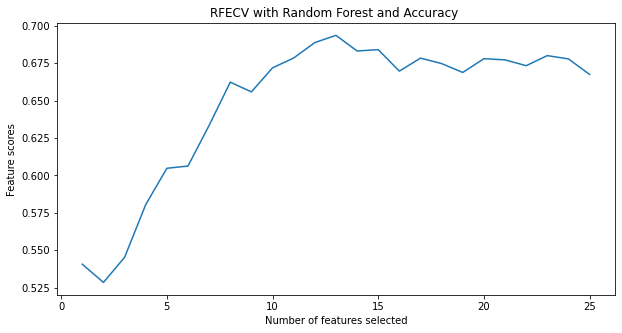

['age', 'job', 'education', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'mar_married', 'lh_housing']


In [92]:
#remodelling with RFECV

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfecv_rf_resam = RFECV(estimator = rf_resam,step =1,cv= StratifiedKFold(10),scoring = 'accuracy')
rfecv_rf_resam.fit(x_rf_resam,y_rf_resam)

print('Optimal Number of features: {}'.format(rfecv_rf_resam.n_features_))

plt.figure(figsize = (10,5))
plt.title('RFECV with Random Forest and Accuracy ')
plt.xlabel('Number of features selected')
plt.ylabel('Feature scores')
plt.plot(range(1,len(rfecv_rf_resam.grid_scores_)+1),rfecv_rf_resam.grid_scores_)
plt.show()

featurelist_rf_resam = list(zip(x_rf_resam.columns,rfecv_rf_resam.support_))
important_features_rf_resam = []
for key,value in enumerate(featurelist_rf_resam):
    if(value[1])==True:
        important_features_rf_resam.append(value[0])
        
print(important_features_rf_resam)

In [ ]:
#Using RFECV we reduced the number of features from 25 to 13. The relevant features are ['age', 'job', 'education',
#'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
#'mar_married', 'lh_housing'] now


In [94]:
#creating new new x and y datasets and listing out the omitted features

x_rfecv_rf_resam = x_rf_resam[important_features_rf_resam]
y_rfecv_rf_resam = y_rf_resam
print("The list of omitted features during RFECV")
set(list(x_rf_resam.columns)) ^ set(list(x_rfecv_rf_resam))

The list of omitted features during RFECV


{'contact',
 'day_mon',
 'day_thu',
 'day_tue',
 'day_wed',
 'default',
 'lh_both_yes',
 'lh_loan',
 'mar_single',
 'mon_low',
 'pct_nonexistent',
 'pct_success'}

In [95]:
#remodelling using the new dataset after RFECV

x_train_rfecv_rf_resam,x_test_rfecv_rf_resam,y_train_rfecv_rf_resam,y_test_rfecv_rf_resam = train_test_split(x_rfecv_rf_resam,
                                                                                                         y_rfecv_rf_resam,
                                                                                                         test_size = 0.3, 
                                                                                                         random_state = 117)

rf_resam.fit(x_train_rfecv_rf_resam,y_train_rfecv_rf_resam)

y_pred_rfecv_rf_resam = rf_resam.predict(x_test_rfecv_rf_resam)

cm_rfecv_rf_resam = confusion_matrix(y_test_rfecv_rf_resam,y_pred_rfecv_rf_resam)
accu_rfecv_rf_resam = accuracy_score(y_test_rfecv_rf_resam,y_pred_rfecv_rf_resam)
print(cm_rfecv_rf_resam)
print('Accuracy Resampled - {} Accuracy RFECV DT Accuracy - {}'.format(accu_rf_resam,accu_rfecv_rf_resam))

#area under the curve

auc_rfecv_rf_resam = metrics.roc_auc_score(y_test_rfecv_rf_resam,y_pred_rfecv_rf_resam)
print('AUC Resampled - {} AUC RFECV DT Accuracy - {}'.format(auc_rf_resam,auc_rfecv_rf_resam))

#F1 score

f1_rfecv_rf_resam = f1_score(y_test_rfecv_rf_resam,y_pred_rfecv_rf_resam)
print('F1 Score Resampled - {} F1 RFECV DT Accuracy - {}'.format(f1_rf_resam,f1_rfecv_rf_resam))

[[6844  951]
 [ 237 7509]]
Accuracy Resampled - 0.9402869828196384 Accuracy RFECV DT Accuracy - 0.9235570426613474
AUC Resampled - 0.9405730164963922 AUC RFECV DT Accuracy - 0.92370114012786
F1 Score Resampled - 0.9423100833022504 F1 RFECV DT Accuracy - 0.9266938171047759


In [ ]:
#Though the accuracy, AUC and F1 score slightly decreased when compared to the dataset before RFECV, there is a huge 
#improvement in the process by reducing its complexity. The number of features reduced to 13 without any considerable
#loss in the prediction accuracy of the model